In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

# Table of Contents
>## 1. Perceptron
* 1.1. Definition
* 1.2. Loss Function
* 1.3. Weight Update
* 1.4. Perceptron - `Scikit-Learn`

>## 2. SVM - Support Vector Machine
* 2.1. Algorithm
* 2.2. Slack Variable
* 2.3. SVM - `Scikit-Learn`
* 2.4. Example - Olivetti Faces Dataset

>## 3. kSVM - Kernel Support Vector Machine
* 3.1. XOR $\rightarrow$ why we need kSVM
* 3.2. Basis Function
* 3.3. Kernel Trick
* 3.4. Kernel Trick - Advantage
* 3.5. Frequently Used Kernels
* 3.6. kSVM - `Scikit-Learn`
* 3.7. Example - Iris Dataset

# 1. Perceptron
* Simplest form of **discriminant function based prediction model**

<img src="https://datascienceschool.net/upfiles/41974f50e89249aebe059fb4d60310aa.png" style="width:70%; margin: 0 auto 0 auto;">

## 1.1. Definition
* **Input**

>$$ x = (1, x_1, \cdots, x_m) $$

* **Discriminant Fn.**

>$$ $$ f(x) = w^T x $$ $$

* **Output** (Activation Fn. applied to Discriminant Fn.)

>$$ y = a(f(x)) = a(w^Tx) $$

* **Heaviside Step Fn.** (Activation Fn. for Perceptron)

>$$ y = a(z) = \begin{cases} -1, & z < 0, \\ 1, & z \ge 0 \end{cases} $$

## 1.2. Loss Function
* **Perceptron Loss Function**:
  * $M$: group of missclassified data

> $$ E = \sum_{i=1}^N L(\hat{y}_i, y_i) $$
>
> $$ L(\hat{y}_i, y_i) = \max(0, -\hat{y}_iy_i) $$
>
> $$ E = \sum_{i=1}^N \max(0, -\hat{y}_iy_i) = - \sum_{i \in M} \hat{y}_i y_i $$

* **Differentiable Loss Function**:

> $$ E(w) = - \sum_{i \in M} w^Tx_i y_i $$


## 1.3. Weight Update
* **Gradient Descent**:
  * $\eta$: step size (a.k.a. **learning rate**)

> $$ \dfrac{dE}{dw} = - \sum_{i \in M} x_i y_i $$
>
> $$ \begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k \sum_{i \in M} x_i y_i \\
\end{eqnarray}
$$

* **SGD(Stochastic Gradient Descent)**:
  * Approximate the gradient using **minibatch**
  * For Perceptron, we use SGD with **minibatch size = 1** (*Update the weight using one misclassified sample at a time*)

>$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k  x_i y_i \\
\end{eqnarray}
$$

## 1.4. Perceptron - `Scikit-Learn`
* **`Perceptron` class**
  * Simple perceptron model
* **`SGDClassifier` class**
  * Customized perceptron model
  * **Parameters**:

>* **`loss`: loss function**
>  * `'hinge'`, `'log'`, `'modified_huber'`, `'squared_hinge'`, `'perceptron'`, `'squared_loss'`, `'huber'`, `'epsilon_insensitive'`,  `'squared_epsilon_insensitive'`
>
>* **`penalty`: regularization condition**
>  * `'none'`, `'l2'`, `'l1'`, or `'elasticnet'`
>
>* **`alpha` & `l1_ratio`: regularization weights**
>
>* **`max_iter`: maximum iteration**
>
>* **`eta0`: learning rate, $\eta$**

### `Perceptron` class

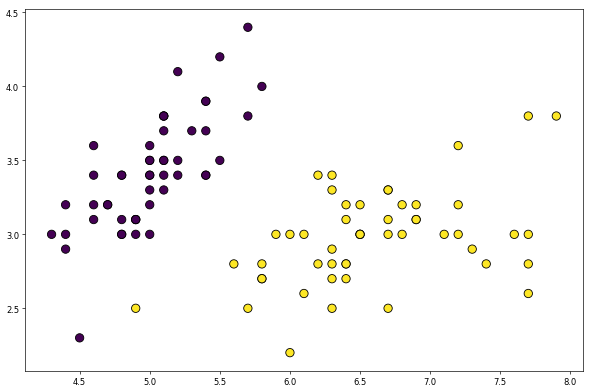

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k')
plt.show()

In [4]:
from sklearn.linear_model import Perceptron

def plot_perceptron(n):
    plt.figure(figsize=(12, 8), dpi=60)
    model = Perceptron(max_iter=n, eta0=0.1, random_state=1).fit(X, y)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=2, edgecolor='k', c=y, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


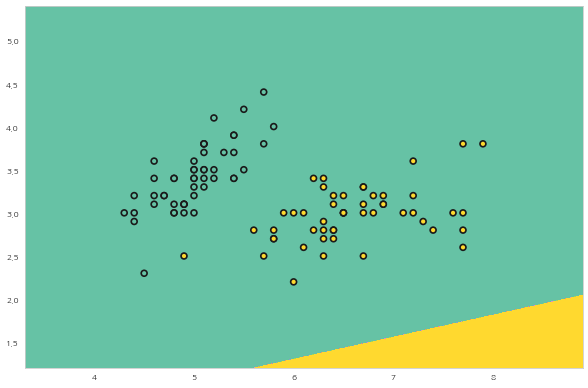

In [3]:
plot_perceptron(1)

In [5]:
from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',))

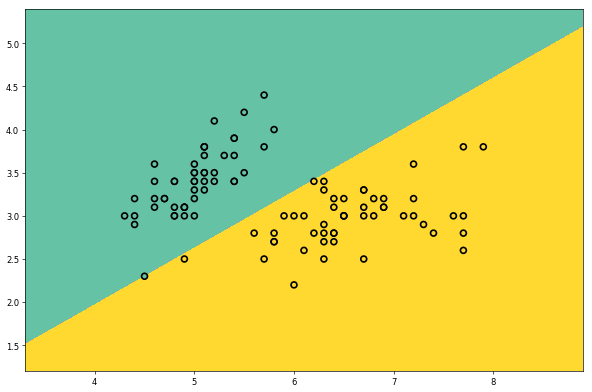

In [6]:
plot_perceptron(500)

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

model = Perceptron(max_iter=500, eta0=0.1, random_state=1).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

### `SGDClassifier` class

In [8]:
from sklearn.linear_model import SGDClassifier

def plot_sgd(n):
    plt.figure(figsize=(12, 8), dpi=60)
    model = SGDClassifier(loss="hinge", max_iter=n, random_state=1).fit(X, y)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', linewidth=2, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)    
    plt.grid(False)
    plt.show()

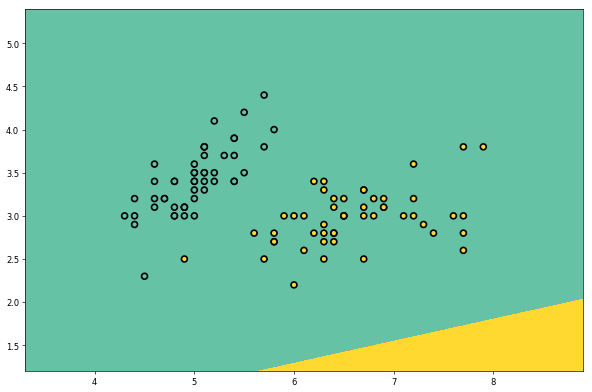

In [9]:
plot_sgd(1)

In [10]:
from ipywidgets import widgets
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1,max=100,step=1,value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',))

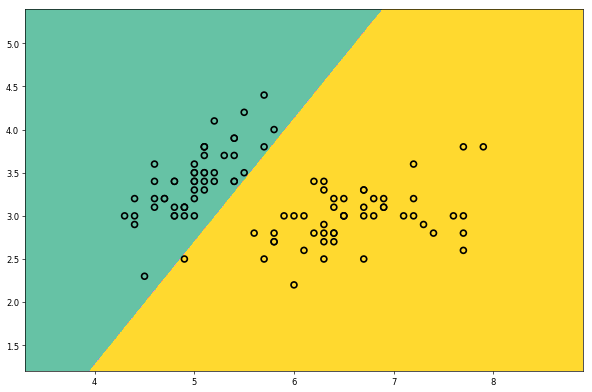

In [11]:
plot_sgd(1000)

In [12]:
model = SGDClassifier(loss="hinge", max_iter=1000, random_state=1).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

# 2. SVM - Support Vector Machine
* **Perceptron - Pros & Cons**:
  * Pros: simple and fast
  * cons: **decision hyperplane is not uniquely defined**
* **SVM: Perceptron + Condition for Decision Boundary**
  


<img src="https://datascienceschool.net/upfiles/632bf7973c904579954235a61cc340e1.png" style="width:100%; margin: 0 auto 0 auto;">

## 2.1. Algorithm

#### 1. We have $N$ training samples

>$$ (x_1, y_1), (x_2, y_2), \ldots, (x_i, y_i), \ldots, (x_N, y_N) $$
>
>$$ y = \begin{cases} +1 \\ -1 \end{cases} $$
>
>* $y=+1 \rightarrow x_+$
>* $y=-1 \rightarrow x_-$

#### 2. Discriminant function, $f(x)$

>$$ f(x) = w^Tx-w_0 $$ 
>
>$$ f(x_+) = w^Tx_+ - w_0 > 0 $$
>
>$$ f(x_-) = w^Tx_- - w_0 < 0 $$

#### 3. Support:  $x^+$ and $x^-$

>* $x^+$: $x_+$ with smallest $f(x_+)$
>* $x^-$: $x_-$ with largest $f(x_-)$
>* $x^+$ & $x^-$: **support** or **support vector**

#### 4. Find a discriminant function such that,

>$$ f(x^+) = w^T x^{+} - w_0 = +1 $$
>
>$$ f(x^-) = w^T x^{-} - w_0 = -1 $$

#### 5. Then, the following inequalities are satisfied

>$$ w^Tx_+ - w_o \geq 1 $$
>
>$$ w^Tx_- - w_o \leq -1 $$

#### 6. Margin
* The distance between the decision boundary and $x^+$ & $x^-$ **combined**

>$$ \dfrac{w^T x^{+} - w_0}{\| w \|} = \dfrac{1}{\| w \|} $$
>
>$$ -\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{1}{\| w \|} $$
>
>$$ \text{margin} = \dfrac{w^T x^{+} - w_0}{\| w \|}  -\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{2}{\| w \|}$$

#### 7. Margin is maximized when $\| w \|$ is minimized

#### 8. Thus, we set the loss function as the following

>$$ L = \dfrac{1}{2} ||w||^2 = \dfrac{1}{2} w^T w $$

#### 9. We add an inequality constraint that all samples must be correctly classified

>$$ y_i \cdot f(x_i) = y_i \cdot( w^Tx_i - w_o) \geq 1 \;\;\; ( i = 1, \ldots, N )$$

#### 10. With this constraint, we have a new loss function

>$$ L = \dfrac{1}{2} w^T w - \sum_{i=1}^N a_i \{ y_i \cdot ( w^Tx_i - w_o) - 1 \} $$
>
>* $a_i$ : lagrange multiplier
>* $(w^Tx_i - w_o) - 1 \neq 0 \rightarrow a=0$

#### 11. Optimization

>$$ \dfrac{\partial L}{\partial w} = 0 $$
>
>$$ \dfrac{\partial L}{\partial w_0} = 0 $$
>$$\;$$
>$$\;$$
>$$ 
\begin{eqnarray}
\dfrac{\partial L}{\partial w} 
&=& \dfrac{\partial}{\partial w} \left( \dfrac{1}{2} w^T w \right) - 
    \dfrac{\partial}{\partial w} \sum_{i=1}^N \left( a_i y_i w^Tx_i - a_i y_i w_o - a_i \right) \\
&=& w - \sum_{i=1}^N  a_i y_i x_i \\
&=& 0
\end{eqnarray}
$$
>
>$$ 
\begin{eqnarray}
\dfrac{\partial L}{\partial w_0} 
&=& \dfrac{\partial}{\partial w_0} \left( \dfrac{1}{2} w^T w \right) - 
    \dfrac{\partial}{\partial w_0} \sum_{i=1}^N \left( a_i y_i w^Tx_i - a_i y_i w_o - a_i \right) \\
&=& \sum_{i=1}^N  a_i y_i \\
&=& 0
\end{eqnarray}
$$
>$$\;$$
>$$\;$$
>$$ 
w = \sum_{i=1}^N a_i y_i x_i
$$
>
>$$ 
0 = \sum_{i=1}^N a_i y_i 
$$

#### 12. Apply the result of (11) to the original loss function, to get rid of $w$ and $w_0$

>$$
\begin{eqnarray}
L
&=& \dfrac{1}{2} w^T w - \sum_{i=1}^N a_i \{ y_i \cdot ( w^Tx_i - w_o) - 1 \}  \\
&=& \dfrac{1}{2} \left( \sum_{i=1}^N a_i y_i x_i \right)^T \left( \sum_{j=1}^N a_j y_j x_j \right) - 
    \sum_{i=1}^N a_i \left\{ y_i \cdot \left( \left( \sum_{j=1}^N a_j y_j x_j \right)^Tx_i - w_o \right) - 1 \right\}  \\
&=& \dfrac{1}{2} \sum_{i=1}^N \sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j - 
    \sum_{i=1}^N \sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j +
    w_0 \sum_{i=1}^N a_i y_i + \sum_{i=1}^N a_i   \\
&=& \sum_{i=1}^N a_i - \dfrac{1}{2}\sum_{i=1}^N\sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j
\end{eqnarray}
$$
>$$\;$$
>$$
L = \sum_{i=1}^N a_i - \dfrac{1}{2}\sum_{i=1}^N\sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j
$$

#### 13. Then, $a$ should satisfy the following

>$$
\sum_{i=1}^N a_i y_i = 0
$$
>
>$$
a_i \geq 0 \;\;\;  ( i = 1, \ldots, N )
$$

#### 14. Now the problem is not to find $w$, but to find $a$ $\rightarrow$ such is called "Dual Form"
* Dual form: QP(Quadratic Programming) with Box-condition $\rightarrow$ easily soluble

#### 15. Now, solve the dual form, to find $a$ that minimizes $L$

>$$ f(x) = w^T x - w_0 = \sum_{i=1}^N a_i y_i x_i^T x - w_0 $$

#### 16 . $w_0$ can be obtained using

>$$ w_0 = w^T x^{+} - 1 $$
>
>$$ w_0 = w^T x^{-} + 1 $$
>
>$$ w_0 = \dfrac{1}{2} w^T (x^+ + x^{-}) $$

#### 17. Final form of the Discriminant Function
* Using that fact that if $a_i=0$, $x_i$ makes no contribution

>$$ f(x) = a^+ x^T x^+ - a^- x^T x^- - w_0 $$
>
>* $x^T x^+$: Cosine similarity between $x$ and $x^+$
>* $x^T x^-$: Cosine similarity between $x$ and $x^-$
>* Discriminant Fn. in a nutshell: **compares the cosine similarities**

## 2.2. Slack Variable
* If the data is **not linearly separable**, allow errors by introducing the **slack variable**

#### 1. Original Discriminant Fn.

>$$ w^Tx_+ - w_0 \geq 1 $$  
>
>$$ w^Tx_- - w_0 \leq -1 $$

#### 2. Introduce the Slack Variable

>$$ w^Tx_+ - w_0 \geq +1-\xi_i $$
>
>$$ w^Tx_- - w_0 \leq -1+\xi_i $$
>
>$$ y_i \cdot( w^Tx_i - w_o) \geq +1-\xi_i $$
>
>$$ \text{where} \;\; \xi_i \geq 0 \;\;\; (i=1, \ldots, N) $$

#### 3. Rewrite the loss function

>$$ 
L = \dfrac{1}{2} ||w||^2 - \sum_{i=1}^N a_i (y_i \cdot ( w^Tx_i - w_o) - 1 + \xi_i ) - \sum_{i=1}^N \mu_i \xi_i  + C \sum_{i=1}^N \xi_i    
$$
>
>* $C$: prevents the sum of $\xi_i$ from getting too big




<img src="https://datascienceschool.net/upfiles/d5735e8d8db342858166a790f108e8fc.png" style="width:100%; margin: 0 auto 0 auto;">

## 2.3. SVM - `Scikit-Learn`
* `SVC` class (Support Vector Classifier)
* **Attributes**:
  * `n_support_`: no. of support for each class
  * `support_`: index of support for each class
  * `support_vectors_`: $x$ values of support for each class
  * `coef_`: $w$
  * `intercept_`: $-w_0$
  * `dual_coef_`: a vector, having $a_i \cdot y_i$ as its elements

### Step 1. Prepare Data

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

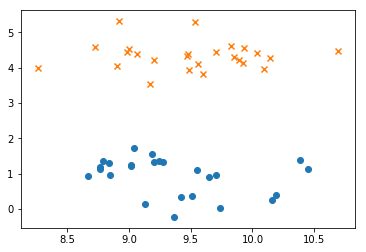

In [14]:
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.show()

### Step 2. `SVC(kernel='linear', C=1e10)`

In [16]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

In [17]:
model.n_support_ 

array([1, 1], dtype=int32)

In [18]:
model.support_

array([42,  1], dtype=int32)

In [19]:
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [20]:
y[model.support_]

array([-1,  1])

### Step 3. Visualization

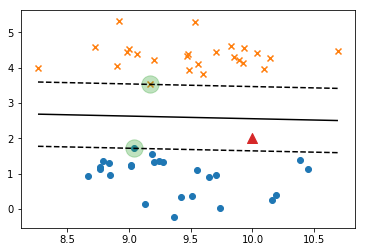

In [21]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)

plt.show()

### Step 4. Make prediction for new data point, `x_new`

In [22]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.61101582])

In [23]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

In [24]:
# dual_coef_ = a_i * y_i
model.dual_coef_

array([[-0.60934379,  0.60934379]])

In [25]:
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
model.intercept_

array([-0.61101582])

### Step 5. Try for different values of `C`

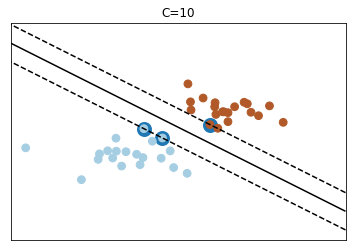

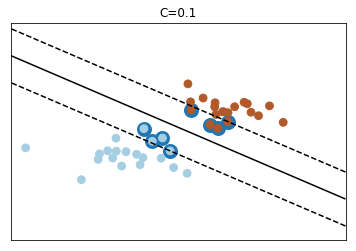

In [26]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

fignum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)
    
    plt.figure(fignum)
    
    x_jin = -5; x_jax = 5
    y_jin = -9; y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    
    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)

    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    plt.axis('tight')
    plt.show()
    
    fignum += 1

## 2.4. Example - Olivetti Faces dataset

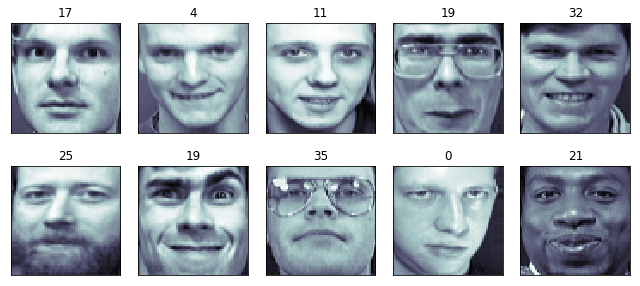

In [27]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, 
                                                    test_size=0.4, random_state=0)

In [29]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

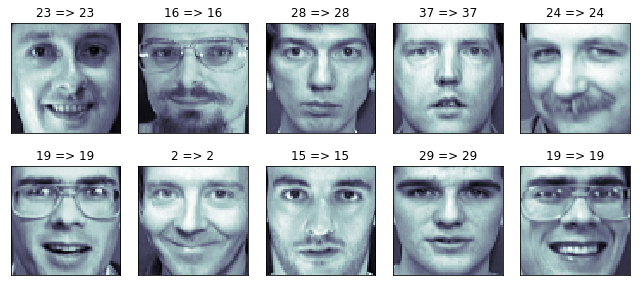

In [30]:
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" % (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [32]:
accuracy_score(y_pred_train, y_train)

1.0

In [33]:
accuracy_score(y_pred_test, y_test)

0.925

# 3. kSVM

## 3.1. XOR $\rightarrow$ why we need kSVM
* Perceptron & SVM: **linear discriminant fn.**
  * $\rightarrow$ cannot solve XOR problems (the datapoints cannot be separated using a hyperplane)

| | X2=0 | X2=1 |
|-|-|-|
|X1=0| 0 | 1 |
|X1=1| 1 | 0 | 

### XOR problem

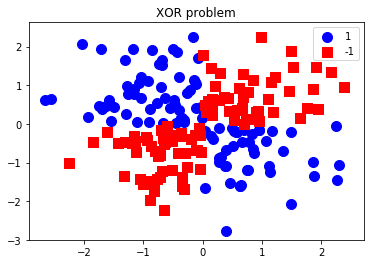

In [34]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='o', label='1', s=100)
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1', s=100)
plt.ylim(-3.0)
plt.legend()
plt.title("XOR problem")
plt.show()

### Try to solve it with linear SVC

In [35]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y== 1, 0], X[y== 1, 1], c='b', marker='o', label='+1', s=100)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', marker='s', label='-1', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

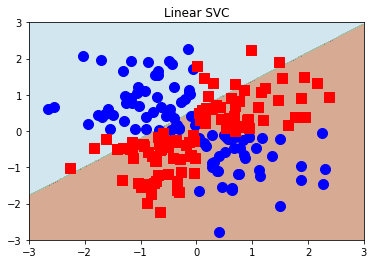

In [36]:
from sklearn.svm import SVC

svc = SVC(kernel="linear").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "Linear SVC")

## 3.2. Basis Function
* **Basis Function**: transform $D$-dim $x$ into $M$-dim $\phi(x)$

>$$ \phi(\cdot): \mathbf{R}^D \rightarrow \mathbf{R}^M $$
>
>$$ x=(x_1, x_2, \cdots, x_D) \;\;\; \rightarrow \;\;\; \phi(x) = (\phi_1(x), \phi_2(x), \cdots, \phi_M(x)) $$

* **For example, we can try cross-multiplication term**

>$$ (x_1, x_2) \;\;\; \rightarrow \;\;\; \phi(x) = (x_1^2, \sqrt{2}x_1x_2, x_2^2) $$

In [37]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

X = np.arange(8).reshape(4, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [38]:
FunctionTransformer(basis).fit_transform(X)

array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ],
       [36.        , 59.39696962, 49.        ]])

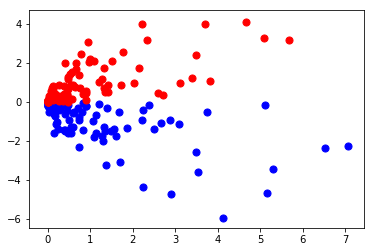

In [39]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor== 1, 0], X_xor2[y_xor== 1, 1], c="b", s=50)
plt.scatter(X_xor2[y_xor==-1, 0], X_xor2[y_xor==-1, 1], c="r", s=50)
plt.show()

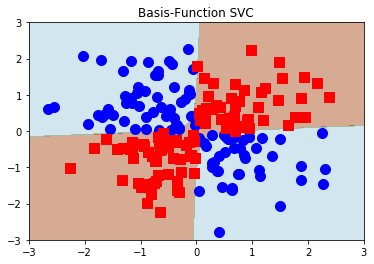

In [40]:
from sklearn.pipeline import Pipeline

basismodel = Pipeline([("basis", FunctionTransformer(basis)), ("svc", SVC(kernel="linear"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "Basis-Function SVC")

## 3.3. Kernel Trick

#### 1. Original dual form

>$$ L =  \sum_{n=1}^N a_n - \dfrac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m y_n y_m x_n^T x_m $$
>
>$$ y = w^T x - w_0 = \sum_{n=1}^N a_n y_n x_n^T x - w_0 $$

#### 2. Replace $x$ with a basis function $\phi(x)$

>$$ L =  \sum_{n=1}^N a_n - \dfrac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m y_n y_m \phi(x_n)^T \phi(x_m) $$
>
>$$ y = w^T x - w_0 = \sum_{n=1}^N a_n y_n \phi(x_n)^T \phi(x) - w_0 $$

#### 3. Define kernel
* Note that the basis function is used only in the form of $\phi(x_i)^T\phi(x_j)$

>$$ k(x_i, x_j) = \phi(x_i)^T \phi(x_j) $$

#### 4. Modified Discriminant Function

>$$ L =  \sum_{n=1}^N a_n - \dfrac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m y_n y_m k(x_n, x_m) $$
>
>$$ y = w^T x - w_0 = \sum_{n=1}^N a_n y_n k(x_n, x) - w_0 $$



## 3.4. Kernel Trick - Advantage
* Kernel Trick **makes calculation easier**
* **Example)**

>$$ \phi(x_i) = \phi([x_{i,1}, x_{i,2}]) = (x_{i,1}^2, \sqrt{2}x_{i,1}x_{i,2}, x_{i,2}^2) $$
>
>$$ 
\begin{eqnarray}
k(x_1, x_2) 
&=& (x_1^Tx_2)^2 \\
&=& (x_{1,1}x_{2,1} + x_{1,2}x_{2,2})^2 \\
&=& x_{1,1}^2x_{2,1}^2 + 2x_{1,1}x_{2,1}x_{1,2}x_{2,2} + x_{1,2}^2y_{2,2}^2 \\
&=& (x_{1,1}^2, \sqrt{2}x_{1,1}x_{1,2}, x_{1,2}^2)  (x_{2,1}^2, \sqrt{2}x_{2,1}x_{2,2}, x_{2,2}^2)^T \\
&=& \phi(x_1)^T \phi(x_2)
\end{eqnarray}
$$

* Without kernel trick: **11 steps of calculation**

>* $\phi(x_1)$ (4) + $\phi(x_2)$ (4) + Inner Product (3)

* With kernel trick: **3 steps of calculation**

>* $x_1^Tx_2$ (2) + square (1)

## 3.5. Frequently Used Kernels
* Basis functions of some kernels have infinite dimension $\rightarrow$ can deal with non-linearity

#### No Kernel

>$$ k(x_1, x_2) = x_1^Tx_2 $$

#### Polynomial Kernel

>$$ k(x_1, x_2) = (\gamma (x_1^Tx_2) + \theta)^d $$

#### RBF(Radial Basis Function) or Gaussian Kernel

>$$ k(x_1, x_2) = \exp \left( -\gamma ||x_1-x_2||^2 \right) $$

#### Sigmoid Kernel

>$$ k(x_1, x_2) = \tanh(\gamma (x_1^Tx_2) + \theta) $$

## 3.6. kSVM - `Scikit-Learn`

#### Polynomial

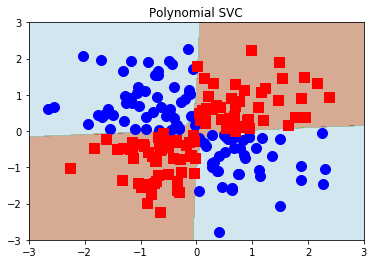

In [41]:
polysvc = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, polysvc, "Polynomial SVC")

#### RBF

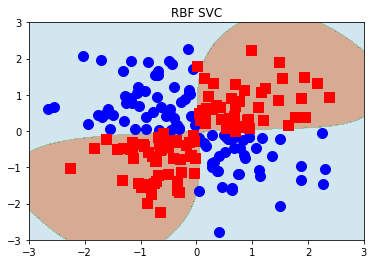

In [42]:
rbfsvc = SVC(kernel="rbf").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, rbfsvc, "RBF SVC")

#### Sigmoid

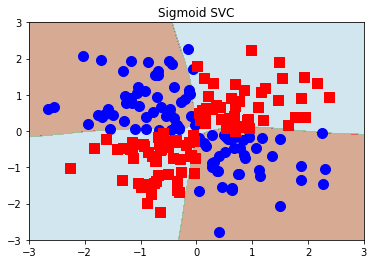

In [43]:
sigmoidsvc = SVC(kernel="sigmoid", gamma=2, coef0=2).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, sigmoidsvc, "Sigmoid SVC")

#### RBF - changing kernel parameter

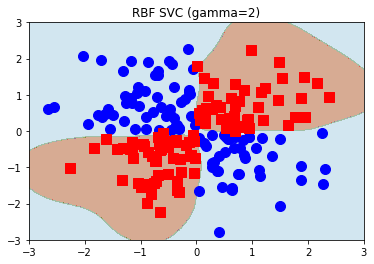

In [44]:
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=2).fit(X_xor, y_xor), "RBF SVC (gamma=2)")

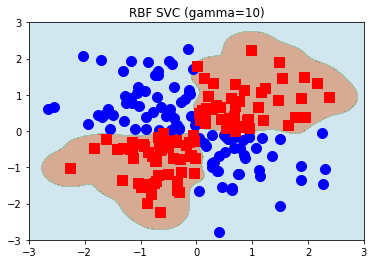

In [45]:
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=10).fit(X_xor, y_xor), "RBF SVC (gamma=10)")

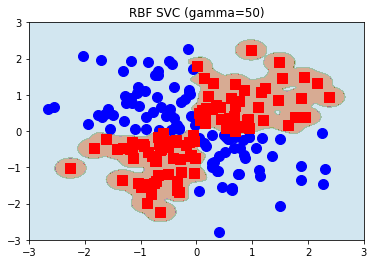

In [46]:
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=50).fit(X_xor, y_xor), "RBF SVC (gamma=50)")

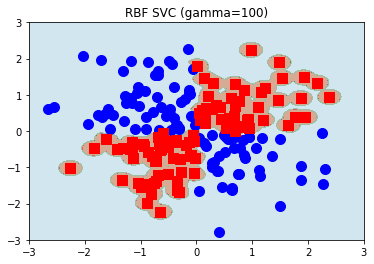

In [47]:
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=100).fit(X_xor, y_xor), "RBF SVC (gamma=100)")

## 3.7. Example - Iris Dataset 

In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y==1, 0], X[y==1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y==2, 0], X[y==2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

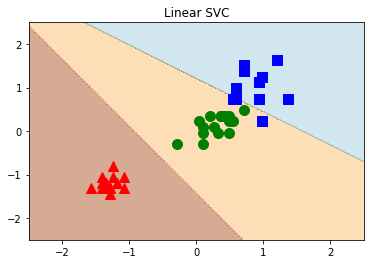

In [49]:
model = SVC(kernel='linear').fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "Linear SVC")

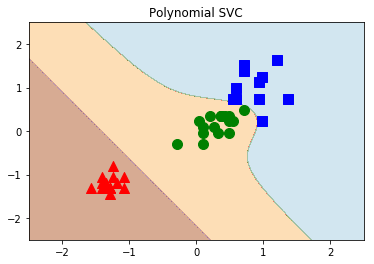

In [50]:
model = SVC(kernel='poly', random_state=0, gamma=10, C=1.0).fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "Polynomial SVC")

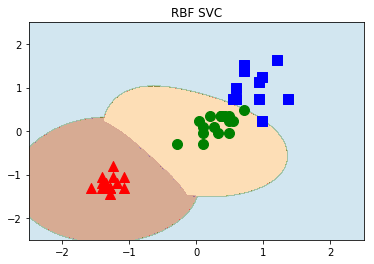

In [51]:
model = SVC(kernel='rbf', random_state=0, gamma=1, C=1.0).fit(X_test_std, y_test)
plot_iris(X_test_std, y_test, model, "RBF SVC")